<a href="https://colab.research.google.com/github/kang-jeong-uk/OSSP/blob/main/Heart_Attack_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # 행렬, 다차원 배열을 다룰 때 사용
import pandas as pd # 데이터를 다룰 때 사용
import seaborn as sns #matlab을 기반으로 한 시각화
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-dark')

from google.colab import drive
drive.mount('/content/Kaggle_Heart_Attack_data')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/Kaggle_Heart_Attack_data


In [2]:
# data download : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

data = pd.read_csv("/content/Kaggle_Heart_Attack_data/MyDrive/Kaggle_Heart_Attack_data/heart.csv")
data.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
display(data.info())
#display(data.describe())
display(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

(303, 14)

In [ ]:
output_graph1=px.pie(data, names= "sex",title="sex")
output_graph1.show()
output_graph2=px.pie(data, names= "output",title="Output")
output_graph2.show()

print("Female Value Counts: \n{}".format((data[data ["sex"] == 1].reset_index())['output'].value_counts()))
print("Male Value Counts: \n{}".format((data[data ["sex"] == 0].reset_index())['output'].value_counts()))

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(data, hue="output", corner = True)
plt.legend("output")
plt.tight_layout()
plt.plot()

In [ ]:
plt.figure(figsize=(18,6))
sns.displot(data["age"], color="magenta")
plt.title("Total Age distribution")
plt.show()

In [ ]:
ax = px.histogram(data, x="age", color="output", title="Distribution Age and Output")
ax.show()

In [ ]:
X=data[data["sex"]==1].reset_index()  # 여성
Y=data[data["sex"]==0].reset_index()   # 남성

HR=data[data["output"]==1].reset_index()  # Output=1(심장질병에 걸릴 확률이 높은 데이터)
LR=data[data["output"]==0].reset_index()  # Output=0(심장질병에 걸릴 확률이 낮은 데이터)

print("----------------나이 분포------------------")
print("평균: {}".format(round(data["age"].mean())))
print("중앙값: {}".format(round(data["age"].median())))
print("분산: {}".format(round(data["age"].var())))  
print("표준편차: {}\n".format(round((data["age"].std()),3)))


print("--------------성별에 따른 나이 분포-------------------")
print("-남성-")
print("평균: {}".format(round(Y["age"].mean())))
print("중앙값: {}".format(round(Y["age"].median())))
print("분산: {}".format(round(Y["age"].var())))
print("표준편차: {}\n\n".format(round((Y["age"].std()),3)))

print("-여성-")
print("평균: {}".format(round(X["age"].mean())))
print("중앙값: {}".format(round(X["age"].median())))
print("분산: {}".format(round(X["age"].var())))
print("표준편차: {}\n".format(round((X["age"].std()),3)))


print("------------------Output에 따른 나이 분포-----------------------")
print("-심장질병에 걸릴 확률이 높은 나이-")
print("평균: {}".format(round(HR["age"].mean())))
print("중앙: {}".format(round(HR["age"].median())))
print("분산: {}".format(round(HR["age"].var())))
print("표준편차: {}\n\n".format(round((HR["age"].std()),3)))

print("-심장질병에 걸릴 확률이 낮은 나이-")
print("평균: {}".format(round(LR["age"].mean())))
print("중앙값: {}".format(round(LR["age"].median())))
print("분산: {}".format(round(LR["age"].var())))
print("표준편차: {}".format(round((LR["age"].std()),3)))

In [ ]:
# 분류형, 연속형 데이터 나누기
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data[class_cols]

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]


# 분류형 데이터 그래프
for col in class_cols[2:]:
    ax=px.pie(data, names= col, title=col)
    ax.show()


# 연속형 데이터 그래프
continuous = ["age","trtbps","chol","thalachh","oldpeak", "output"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
  for j in range(2):
    sns.distplot(data[continuous[k]], ax = ax1[i][j], color = 'red')
    k +=1

plt.show()

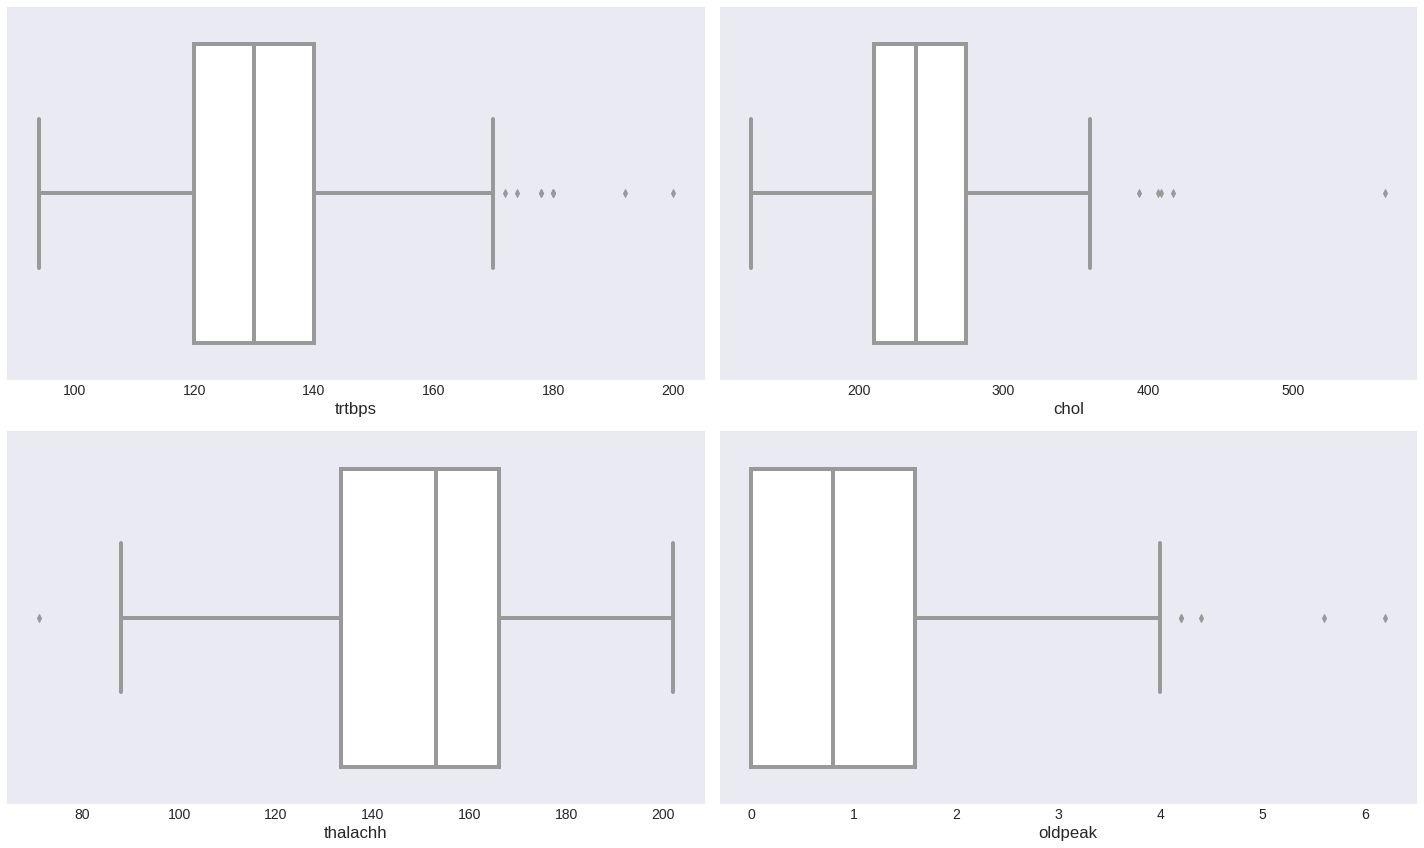

이상치(최댓값 초과) :  4.0
이상치(최솟값 미만) :  -2.4000000000000004
Outliners Present at position: 

trtbps: (array([  8, 101, 110, 203, 223, 241, 248, 260, 266]),)
chol: (array([ 28,  85,  96, 220, 246]),)
thalachh: (array([272]),)
oldpeak: (array([101, 204, 221, 250, 291]),)


In [ ]:
# 이상치 판별, 시각화

fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=data,x=data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

# 이상치 탐색

Q3 = data["oldpeak"].quantile(q=0.75)
Q1 = data["oldpeak"].quantile(q=0.25)
IQR = Q3 - Q1

print("이상치(최댓값 초과) : ",Q3 + IQR*1.5)
print("이상치(최솟값 미만) : ", Q1 - IQR*1.5)


#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(data['trtbps']>170)))
print("chol: {}".format(np.where(data['chol']>369.75)))
print("thalachh: {}".format(np.where(data['thalachh']<84.75)))
print("oldpeak: {}".format(np.where(data['oldpeak']>4)))


In [ ]:
# 이상치 제거(IQR)

import copy

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]
Outliner_delete_data = copy.deepcopy(data)

a=1
for a in range(1, 5):
  Q3 = data[continuous_cols[a]].quantile(q=0.75)
  Q1 = data[continuous_cols[a]].quantile(q=0.25)
  IQR = Q3 - Q1
  outliner_max = data[continuous_cols[a]] > Q3 + IQR*1.5  # 이상치(최댓값 초과)
  outliner_min = data[continuous_cols[a]] < Q1 - IQR*1.5  # 이상치(최솟값 미만)
  outliner_max_index = data[outliner_max].index  # 인덱스
  outliner_min_index = data[outliner_min].index  # 인덱스
  
  print(outliner_max_index)
  print(outliner_min_index)
  #print("----------------------------------------------")
  

  Outliner_delete_data.drop(outliner_max_index, inplace=True, errors='ignore')
  Outliner_delete_data.drop(outliner_min_index, inplace=True, errors='ignore')


fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=Outliner_delete_data,x=Outliner_delete_data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="white")
        k+=1
plt.tight_layout()
plt.show()

display(Outliner_delete_data.info())

In [15]:
# 이상치 제거(로그 변환)
data["age"]= np.log(data.age)
data["trtbps"]= np.log(data.trtbps)
data["chol"]= np.log(data.chol)
data["thalachh"]= np.log(data.thalachh)
print("---Log Transform performed---")

continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


In [18]:
# 데이터 분할(IQR 데이터)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = Outliner_delete_data.iloc[:,:13] # output제외 0부터 12번 인덱스까지
Y = Outliner_delete_data["output"] # output 데이터만

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [16]:
# 데이터 분할(로그 변환 데이터)
X=data.iloc[:,:13]
Y=data["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [10]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

def compute(Y_pred,Y_test):
    # output을 잘 예측했는지 시각화
    
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()


    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # 정확도 계산
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

Execution time of model: 0.01571 seconds



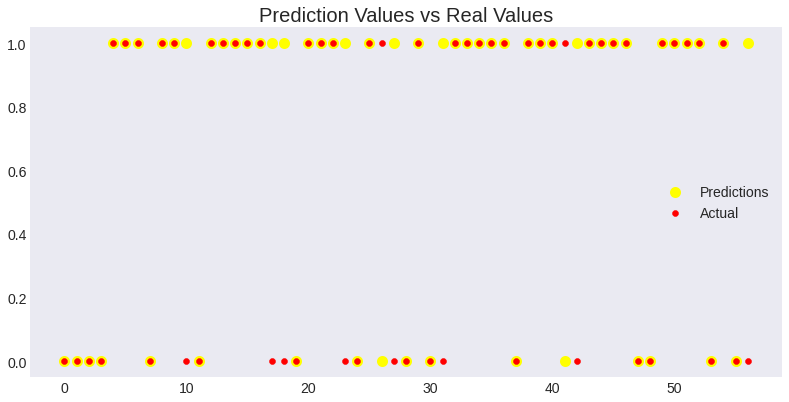

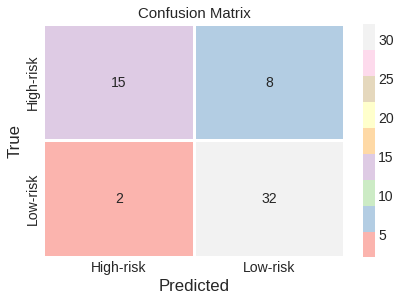

Precision: 0.8 
Recall: 0.941 
F1-Score: 0.865 
Accuracy: 82.456 %
Mean Square Error: 0.175


In [19]:
#Build Model(Logistic Regression)
from sklearn.linear_model import LogisticRegression
import time
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)



Execution time of model: 0.00887 seconds


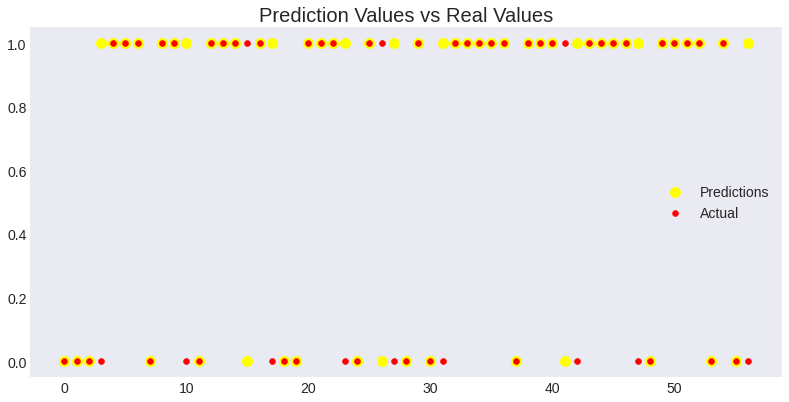

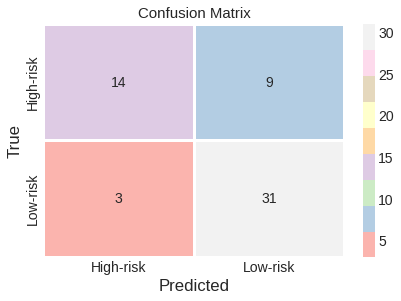

Precision: 0.775 
Recall: 0.912 
F1-Score: 0.838 
Accuracy: 78.947 %
Mean Square Error: 0.211


In [13]:
#Build Model(K-Nearest Neighbours)
from sklearn.neighbors import KNeighborsClassifier
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

Execution time of model: 0.08567 seconds


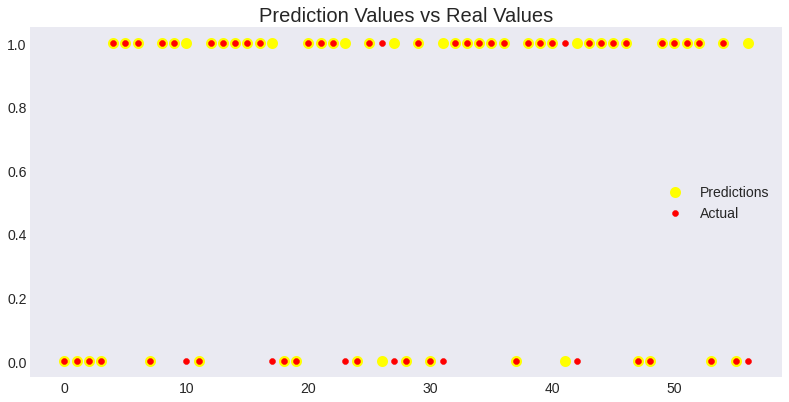

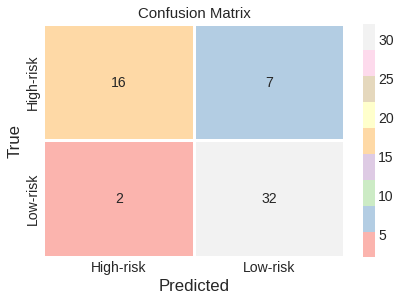

Precision: 0.821 
Recall: 0.941 
F1-Score: 0.877 
Accuracy: 84.211 %
Mean Square Error: 0.158


In [14]:
from xgboost import XGBClassifier
#Build Model(XG Boost)
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)